In [1]:
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
import numpy as np
mlbench = importr('mlbench')

In [195]:
spirals = mlbench.mlbench_spirals(1000, sd=0.07)

<IPython.core.display.Javascript object>


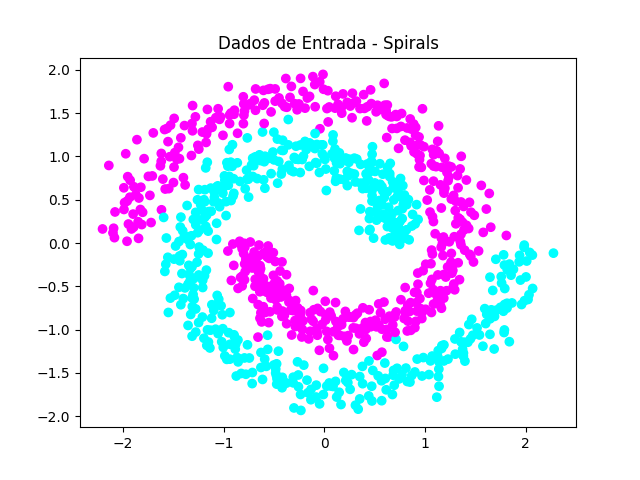

In [198]:
%matplotlib notebook

spiral_data, spiral_class = np.array(spirals[0])*2, np.array(spirals[1])

plt.title('Dados de Entrada - Spirals')
plt.scatter(spiral_data[:, 0], spiral_data[:,1], c = spiral_class, cmap = 'cool')
plt.show()

In [199]:
def calcula_K(u, h):
    return (1/np.sqrt(2*np.pi*h*h))*np.exp(-0.5*u**2)

In [200]:
def prob_ponto_dado_classe(ponto_analisado, pontos_classe, h):
    N = pontos_classe.shape[0]
    px = []
    xi = ponto_analisado.reshape(1, -1)
    kxiall = 0
    for j in range(N):
        xj = pontos_classe[j, :]
        u = np.sqrt(np.sum((xi-xj)**2))/h
        kxiall = kxiall+calcula_K(u, h)
    px.append(kxiall)
    px = np.array(px)/N
    return px

In [201]:
def classe(ponto_analisado, pontos, distribuicoes, h=0.1):
    dist_dif = np.unique(distribuicoes)
    N = pontos.shape[0]
    px = []
    for dist in dist_dif:
        pontos_por_classe = pontos[distribuicoes==dist]
        prob_classe = prob_ponto_dado_classe(ponto_analisado, pontos_por_classe, h)
        px.append(pontos_por_classe.shape[0]/N * prob_classe)
    return(px.index(max(px)))

In [239]:
x1_lin = np.linspace(-2.5, 2.5, 100)
x2_lin = np.linspace(-2.5, 2.5, 100)
X1, X2 = np.meshgrid(x1_lin, x2_lin)
X_lin = np.column_stack((X1.ravel(),X2.ravel()))
classificador = []
X_lin.shape
h = 1.06*np.std(spiral_data)*spiral_data.shape[0]**(-1/5)
for test in X_lin:
    classificador.append(classe(test, spiral_data, spiral_class, 0.01))

<IPython.core.display.Javascript object>


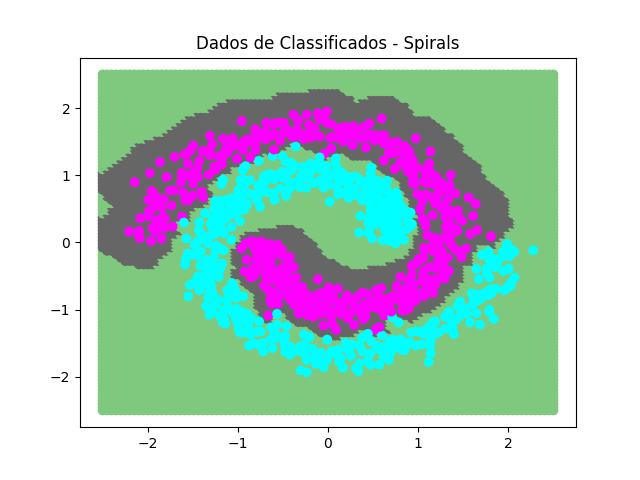

In [244]:
%matplotlib notebook

plt.title('Dados de Classificados - Spirals')
plt.scatter(X_lin[:, 0], X_lin[:,1], c= classificador, cmap = 'Accent')
plt.scatter(spiral_data[:, 0], spiral_data[:,1], c = spiral_class, cmap = 'cool')
plt.show()

<IPython.core.display.Javascript object>


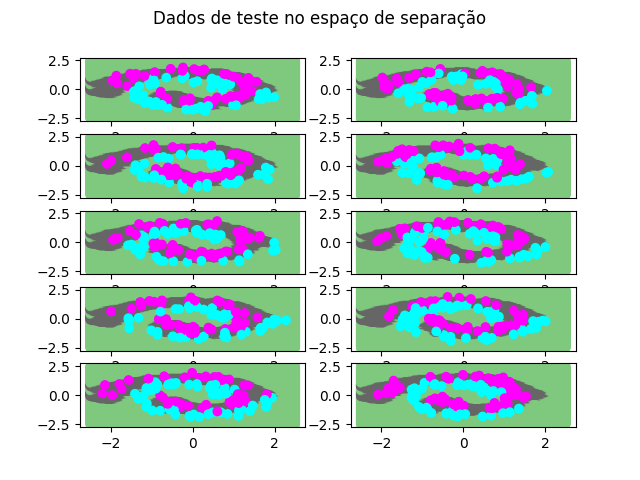

In [245]:
%matplotlib notebook
from copy import copy
from math import floor
folds = 10
data = np.concatenate([spiral_data, spiral_class.reshape(-1, 1)], 1)
np.random.shuffle(data)
k_arrays = np.array_split(data, folds)
wrong = []
right = []
in_class = []
f, (ax) = plt.subplots(5, 2)
f.suptitle('Dados de teste no espaço de separação')
for i in range(len(k_arrays)):
    train_arrays = copy(k_arrays)
    test_array = train_arrays.pop(i)
    train_arrays = np.concatenate(train_arrays)
    in_class.append([])
    for point in test_array[:, :2]:
        in_class[i].append(classe(point, train_arrays[:, :-1], train_arrays[:, -1], 0.01))
    ax[floor(i/2), i%2].scatter(X_lin[:, 0], X_lin[:,1], c = classificador, cmap = 'Accent')
    ax[floor(i/2), i%2].scatter(test_array[:, 0], test_array[:, 1], c = in_class[i], cmap = 'cool')
    accuracy = np.where(in_class[i] == test_array[:, -1]-1, 1, 0)
    right.append((np.count_nonzero(accuracy))/len(test_array)*100)
    wrong.append((len(test_array) - right[i])/len(test_array)*100)
plt.show()

In [246]:
right

[98.0, 97.0, 99.0, 98.0, 100.0, 99.0, 99.0, 99.0, 97.0, 98.0]

In [247]:
np.mean(right)

98.4